In [4]:
import os
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Epoch 1/30


2023-06-14 16:01:20.400157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


186/186 - 3s - loss: 2.3164 - accuracy: 0.2525 - 3s/epoch - 19ms/step
Epoch 2/30
186/186 - 3s - loss: 1.6749 - accuracy: 0.4811 - 3s/epoch - 17ms/step
Epoch 3/30
186/186 - 3s - loss: 1.4552 - accuracy: 0.5476 - 3s/epoch - 17ms/step
Epoch 4/30
186/186 - 3s - loss: 1.3751 - accuracy: 0.5747 - 3s/epoch - 17ms/step
Epoch 5/30
186/186 - 3s - loss: 1.3247 - accuracy: 0.5934 - 3s/epoch - 17ms/step
Epoch 6/30
186/186 - 3s - loss: 1.3036 - accuracy: 0.5934 - 3s/epoch - 17ms/step
Epoch 7/30
186/186 - 3s - loss: 1.2044 - accuracy: 0.6219 - 3s/epoch - 17ms/step
Epoch 8/30
186/186 - 3s - loss: 1.2005 - accuracy: 0.6271 - 3s/epoch - 17ms/step
Epoch 9/30
186/186 - 3s - loss: 1.1858 - accuracy: 0.6263 - 3s/epoch - 17ms/step
Epoch 10/30
186/186 - 3s - loss: 1.1292 - accuracy: 0.6453 - 3s/epoch - 17ms/step
Epoch 11/30
186/186 - 3s - loss: 1.0506 - accuracy: 0.6608 - 3s/epoch - 17ms/step
Epoch 12/30
186/186 - 3s - loss: 1.0240 - accuracy: 0.6682 - 3s/epoch - 17ms/step
Epoch 13/30
186/186 - 3s - loss: 1.0

2023-06-14 16:02:54.841112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 11ms/step - loss: 1.5824 - accuracy: 0.6773


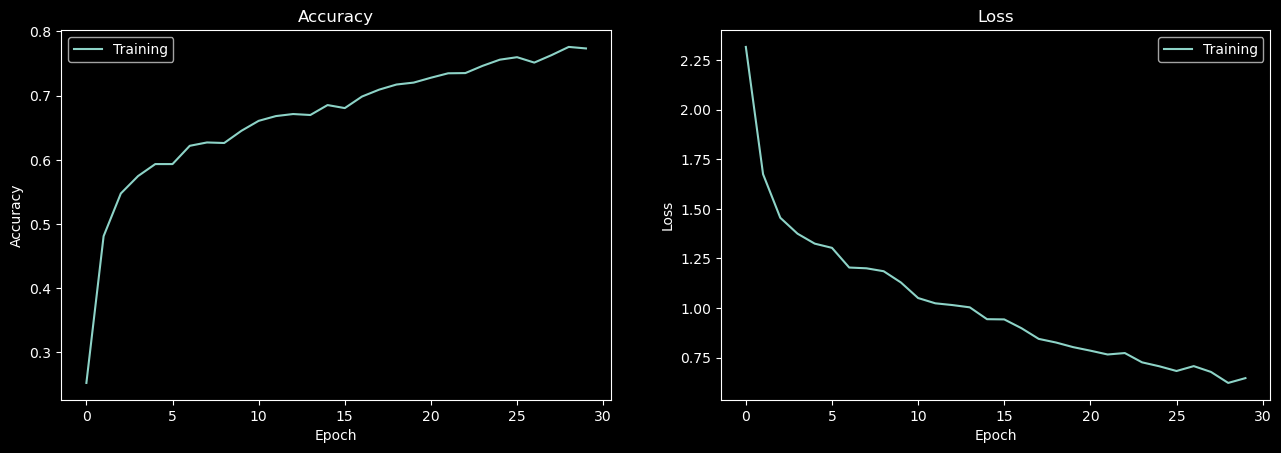

In [6]:
def load_data(csvs_dir):
    train = np.empty((0, 64))
    test = np.empty((0, 64))
    for csv_name in sorted(os.listdir(csvs_dir)):
        if csv_name.endswith('csv'):
            csv_path = os.path.join(csvs_dir,csv_name)
            class_name = csv_path.split('/')[-1].split('_')[0]
            class_name = int(class_name.lstrip('0'))
            # print(class_name)   # 1~26
            val = np.loadtxt(csv_path,delimiter=',')
            class_value = np.full((val.shape[0], ), class_name) # label
            val = np.column_stack((val, class_value))
            # print(val.shape)
            train_ = val[:int(len(val)*0.9), :]
            test_ = val[int(len(val)*0.9):, :]
            # print(train_.shape)
            # print(test_.shape)
            train = np.concatenate((train, train_), axis=0)
            test = np.concatenate((test, test_), axis=0)
    train = np.random.permutation(train)     
    test = np.random.permutation(test)
    train_data = train[:, :63]
    train_labels = train[:, -1]
    test_data = test[:, :63]
    test_labels = test[:, -1]
    return (train_data, train_labels), (test_data, test_labels)

def plot_acc_loss(h):
    plt.figure(figsize=(15.6, 4.8), dpi=100)
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training'], loc=0)
    
    plt.subplot(1,2,2)
    plt.plot(h.history['loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training'], loc=0)
    plt.show()

def build_model():
    input_shape = (63,)
    model = models.Sequential()
    model.add(layers.Dense(5120, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(2560, activation='relu'))
    model.add(layers.Dense(1280, activation='relu'))
    model.add(layers.Dense(640, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model


if __name__ == '__main__':
    (train_data, train_labels), (test_data, test_labels) = load_data('/Users/hsyoon/Downloads/dataset2/csv')
    train_data.reshape(-1, 63)
    train_labels = to_categorical(train_labels-1)
    test_labels = to_categorical(test_labels-1)
    
    model = build_model()
    history = model.fit(train_data, train_labels, epochs=30, verbose=2)
    acc, loss = model.evaluate(test_data, test_labels)
    plot_acc_loss(history)